In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as statmodl

from operator import itemgetter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as pyplt
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


	

In [0]:
# emulate R's pretty plotting
pyplt.style.use('ggplot') 

In [0]:
# print numpy arrays with precision 4
np.set_printoptions(precision=4)
boston = load_boston()
bd = pd.DataFrame(boston.data, columns=boston.feature_names)

In [0]:
#define predictor and response variables
predict = list(bd.columns[1:])
predict
crime_rate = bd.CRIM

In [41]:
#plot for predictors vs response
res, plots = pyplt.subplots(3,4,figsize=(16,12))

for p, predictor in enumerate(predict):
    index = np.unravel_index(p,(4,4))
    plots[index[0], index[1]].scatter(bd[predictor],bd.CRIM, facecolors='none', edgecolors='b', alpha=0.5)
    plots[index[0], index[1]].set_xlabel(predictor)
    plots[index[0], index[1]].set_ylabel('crim')
	    
pyplt.tight_layout()

RIDGE REGRESSION MSE PREDICTION

RIDGE REGRESSION


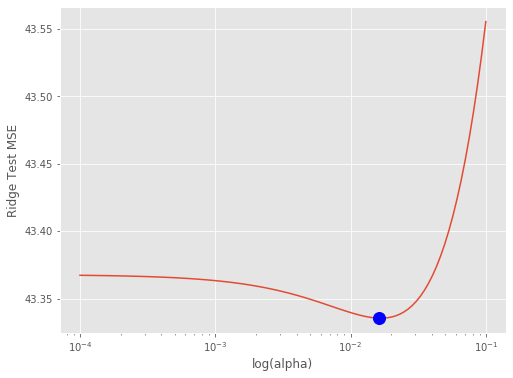

The Ridge Regression Leave-One-Out-Cross-Validation Test MSE Estimate is  43.33543408561732 

Intercept    8.252943
ZN           0.033503
INDUS       -0.077950
CHAS        -1.245300
NOX         -5.845450
RM          -0.289889
AGE          0.001506
DIS         -0.657739
RAD          0.487675
TAX          0.001038
PTRATIO     -0.061160
B           -0.009705
LSTAT        0.229256
dtype: float64


In [42]:
#to scale the predictors, we will normalize option to ridgeCV

#regularization hyperparameters
lmds = 10**np.linspace(-4,-1, 100)
ridg = RidgeCV(alphas=lmds, fit_intercept=True, normalize=True, store_cv_values=True)
ridg.fit(bd[predict],bd.CRIM)

#minimum cv test error alpha
ridge_MSE = np.mean(ridg.cv_values_, axis=0)
MIN_MSE_IDX, MIN_RIDGE_MSE = min(enumerate(ridge_MSE),key=itemgetter(1))

#ridge regression test mse
res, axs_ridge = pyplt.subplots(figsize=(8,6))
axs_ridge.plot(lmds, ridge_MSE)
axs_ridge.plot(lmds[MIN_MSE_IDX], MIN_RIDGE_MSE, marker='o', color='b', markersize=12);
axs_ridge.set_xscale('log');
axs_ridge.set_xlabel('log(alpha)');
axs_ridge.set_ylabel('Ridge Test MSE');
print('RIDGE REGRESSION')
pyplt.show()

	#the Ridge Regression Test MSE
print('The Ridge Regression Leave-One-Out-Cross-Validation Test MSE Estimate is ', MIN_RIDGE_MSE,'\n')

	#the Ridge Regression Coeffecients
print(pd.Series(data = np.hstack([ridg.intercept_,ridg.coef_]), index=['Intercept'] + predict))

LASSO REGRESSION

In [43]:
#lasso model with 100 alpha values and LOOCV
lmds = 10**np.linspace(-5,-2, 200)
lasso_model = LassoCV(alphas=lmds, fit_intercept=True, normalize=True, cv=len(bd))
lasso_model.fit(bd[predict],bd.CRIM)

LASSO_MSE = np.mean(lasso_model.mse_path_, axis=1)
Min_Lasso_Mse = min(LASSO_MSE)

res, axis_lasso = pyplt.subplots(figsize=(8,6))
axis_lasso.plot(lasso_model.alphas_, LASSO_MSE )
axis_lasso.plot(lasso_model.alpha_, Min_Lasso_Mse, marker='o', color='b', markersize=12);
axis_lasso.set_xscale('log');
axis_lasso.set_xlabel('log(alpha)');
axis_lasso.set_ylabel('Lasso Test MSE');
print('LASSO REGRESSION')
pyplt.show()

print('The Lasso Regression Leave-One-Out-Cross-Validation Test MSE Estimate is ', min(LASSO_MSE),'\n')

	#the Lasso Regression Coeffecients
print(pd.Series(data = np.hstack([lasso_model.intercept_, lasso_model.coef_]), index=['Intercept'] + predict))

	#stats models
linear_model = statmodl.OLS(bd.CRIM, statmodl.add_constant(bd[predict].to_numpy()))
result = linear_model.fit()

# 	# Plot residuals to inspect data for nonlinearity
# res, graph = pyplt.subplots(figsize=(6,4))
# graph.scatter(result.fittedvalues.values, result.resid.values, facecolors='none', edgecolors='b');
# graph.set_xlabel('Fitted values');
# graph.set_ylabel('Residuals');

np.random.seed(0)

LASSO REGRESSION


The Lasso Regression Leave-One-Out-Cross-Validation Test MSE Estimate is  43.291638559821386 

Intercept    7.342888
ZN           0.032583
INDUS       -0.067380
CHAS        -1.191164
NOX         -5.447718
RM          -0.219034
AGE          0.000000
DIS         -0.626412
RAD          0.508769
TAX         -0.000000
PTRATIO     -0.052637
B           -0.009304
LSTAT        0.232367
dtype: float64


PCA 

In [44]:
#PCA and linear regression MSE

bd['target'] = boston.target
X = bd.drop('target', axis='columns')
y = bd['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Predicting the Test set results
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

y_test_linear = y_test
y_pred_linear = y_pred
X = principalDf
y = bd['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print("Linear regression mean squared error: %.2f" % mean_squared_error(y_test_linear, y_pred_linear))
print("PCA mean squared error: %.2f" % mean_squared_error(y_test, y_pred))



Linear regression mean squared error: 25.79
PCA mean squared error: 43.50
